## Лабораторная работа - Работа с текстом

Лабораторная работа посвящена работе с текстом и классификации. Мы будем классифицировать твиты о коронавирусе. Скачать данные из папки data.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('coronavirus_tweets_with_labels.csv', encoding='ISO-8859-1', parse_dates=['TweetAt'])
print(df.shape)
df.head()

(41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**Задание 1.**

Сделайте 3 группы в целевой переменной: `Extremely Positive` отметьте как `Positive`, а `Extremely Negative` – `Negative`. Сколько наблюдений в каждом классе? Закодируйте их в числовом виде простым LabelEncoding'ом.

In [51]:
df['Sentiment'] = df['Sentiment'].replace({'Extremely Positive': 'Positive', 'Extremely Negative': 'Negative'})

print(df['Sentiment'].value_counts())

Sentiment
Positive    18046
Negative    15398
Neutral      7713
Name: count, dtype: int64


**Задание 2.**

Добавьте колонку с месяцем твита. Нарисуйте barchart, где по оси Х – месяц, по оси Y – количество твитов в этом месяце.

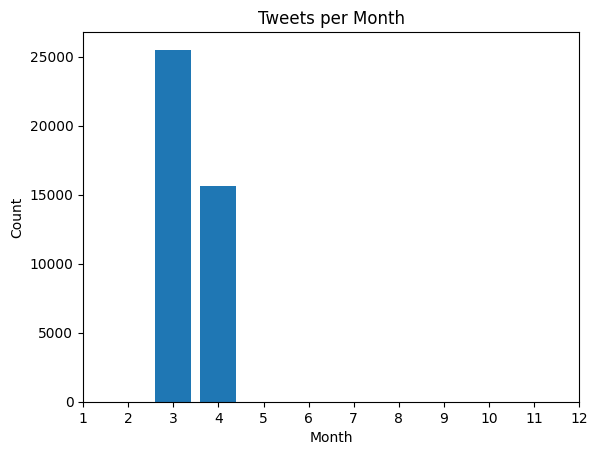

In [52]:
df['Month'] = pd.to_datetime(df['TweetAt'], format='%Y-%m-%d').dt.month

tweets_per_month = df['Month'].value_counts()
plt.bar(tweets_per_month.index, tweets_per_month.values)
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Tweets per Month')
plt.show()

**Задание 3.**

Очистим твиты. Удалите ссылки, пунктуацию, теги, которые начинаются с @ и #.

In [53]:
import re
def clean_tweet(tweet):
    tweet = re.sub(r'@[\w]+', '', tweet)  # Remove @tags
    tweet = re.sub(r'#[\w]+', '', tweet)  # Remove #tags
    tweet = re.sub(r'http\S+', '', tweet)  # Remove links
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
    return tweet

df['CleanedTweet'] = df['OriginalTweet'].apply(clean_tweet)

print(df['CleanedTweet'].head())

0                                            and  and 
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia Woolworths to give elder...
3    My food stock is not the only one which is emp...
4    Me ready to go at supermarket during the  outb...
Name: CleanedTweet, dtype: object


**Задание 4.**

Токенизируйте тексты твитов с помощью `word_tokenize()` из библиотеки `nltk`. Лемматизируйте с помощью `WordNetLemmatizer()` из той же библиотеки.

In [54]:
import nltk
nltk.download('wordnet')
# Инициализация токенизатора
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# Инициализация лемматизатора
lemmatizer = nltk.stem.WordNetLemmatizer()

df['LemmatizedTweet'] = df['CleanedTweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(token) for token in tokenizer.tokenize(x)]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ИВАН\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Задание 5.**

Разделите данные на обучающую и тестовую выборку (используем только обработанные тексты твитов из прошлого задания и разметку) в соотношении 70 на 30.

In [56]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборку
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Сохранение разметки в отдельные переменные
train_labels = train_data['Sentiment']
test_labels = test_data['Sentiment']

# Сохранение обработанных текстов твитов в отдельные переменные
train_texts = train_data['LemmatizedTweet']
test_texts = test_data['LemmatizedTweet']

**Задание 6.**

Примените `CountVectorizer()`, не забудьте убрать стоп-слова с помощью аргумента `stop_words='english'`. Обучите логистическую регрессию. Выведите `classification_report` из библиотеки `sklearn`.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Обработка данных и создание объекта CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(train_texts)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train_counts, train_labels)

# Применение модели к тестовым данным
X_test_counts = vectorizer.transform(test_texts)
y_pred = model.predict(X_test_counts)

# Оценка модели
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.80      0.80      4577
     Neutral       0.70      0.75      0.73      2292
    Positive       0.84      0.83      0.84      5479

    accuracy                           0.80     12348
   macro avg       0.79      0.79      0.79     12348
weighted avg       0.81      0.80      0.80     12348



**Задание 7.**

Подберите параметры `C` и `penalty` для логистической регрессии так, чтобы получилось улучшить результат.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
import time
import warnings
warnings.filterwarnings("ignore", category=Warning)

start_time = time.time()

# Векторизуем один раз для всех моделей
print("Векторизация данных...")
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

print(f"Размерность признаков: {X_train.shape[1]}")
print(f"Векторизация заняла: {time.time() - start_time:.1f} секунд")

# Параметры для перебора
C_values = [ 1e-3, 1e-2, 0.1, 1, 10, 100, 1000]
penalty_options = ['l1', 'l2']

best_score = 0
best_params = {}
best_model = None

# Теперь быстро обучаем модели
for C in C_values:
    for penalty in penalty_options:
        print(f"\nПроверяем C={C}, penalty={penalty}")
        
        # Создаем и обучаем модель
        model = LogisticRegression(
            C=C,
            penalty=penalty,
            solver='liblinear',
            max_iter=300,  # уменьшаем для скорости
            random_state=42,
            class_weight='balanced',
            n_jobs=-1,
            l1_ratio=0.5 if penalty == 'elasticnet' else None
        )
        
        model.fit(X_train, train_labels)
        
        # Оценка
        y_pred = model.predict(X_test)
        score = f1_score(test_labels, y_pred, average='weighted')
        
        print(f"F1-score: {score:.4f}")
        
        # Сохраняем лучшую модель
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'penalty': penalty}
            best_model = model

print(f"\n{'='*50}")
print(f"Общее время: {time.time() - start_time:.1f} секунд")
print(f"Лучшие параметры: {best_params}")
print(f"Лучший F1-score: {best_score:.4f}")
print('='*50)

print("\nДетальный отчет лучшей модели:")
y_pred_best = best_model.predict(X_test)
print(classification_report(test_labels, y_pred_best))

Векторизация данных...
Размерность признаков: 5000
Векторизация заняла: 0.8 секунд

Проверяем C=0.001, penalty=l1
F1-score: 0.2727

Проверяем C=0.001, penalty=l2
F1-score: 0.5980

Проверяем C=0.01, penalty=l1
F1-score: 0.5544

Проверяем C=0.01, penalty=l2
F1-score: 0.6922

Проверяем C=0.1, penalty=l1
F1-score: 0.7331

Проверяем C=0.1, penalty=l2
F1-score: 0.7724

Проверяем C=1, penalty=l1
F1-score: 0.8149

Проверяем C=1, penalty=l2
F1-score: 0.8016

Проверяем C=10, penalty=l1
F1-score: 0.7804

Проверяем C=10, penalty=l2
F1-score: 0.7865

Проверяем C=100, penalty=l1
F1-score: 0.7656

Проверяем C=100, penalty=l2
F1-score: 0.7707

Проверяем C=1000, penalty=l1
F1-score: 0.7636

Проверяем C=1000, penalty=l2
F1-score: 0.7642

Общее время: 20.2 секунд
Лучшие параметры: {'C': 1, 'penalty': 'l1'}
Лучший F1-score: 0.8149

Детальный отчет лучшей модели:
              precision    recall  f1-score   support

    Negative       0.84      0.79      0.81      4577
     Neutral       0.67      0.83   

**Задание 8.**

Попробуйте разные значения `ngram_range`. Как меняется результат?

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Список разных диапазонов n-грамм для тестирования
ngram_ranges = [
    (1, 1),  # только униграммы (отдельные слова)
    (1, 2),  # униграммы + биграммы
    (1, 3),  # униграммы + биграммы + триграммы
    (2, 2),  # только биграммы
    (2, 3),  # биграммы + триграммы
    (3, 3),  # только триграммы
]

# Будем сохранять результаты
results = []

# Фиксируем оптимальные параметры из предыдущего поиска
best_C = best_params['C']
best_penalty = best_params['penalty']

for ngram_range in ngram_ranges:
    print(f"\n{'='*60}")
    print(f"Тестируем ngram_range={ngram_range}")
    print('='*60)
    
    # Создаем новый пайплайн с текущим ngram_range
    pipeline = Pipeline([
        ('vct', CountVectorizer(
            stop_words='english',
            ngram_range=ngram_range,
            max_features=5000  # Ограничим для скорости
        )),
        ('clf', LogisticRegression(
            C=best_C,
            penalty=best_penalty,
            solver='liblinear',
            max_iter=500,
            random_state=42,
        ))
    ])
    
    # Кросс-валидация
    scores = cross_val_score(
        pipeline,
        train_texts,
        train_labels,
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1
    )
    
    mean_score = scores.mean()
    std_score = scores.std()
    results.append((ngram_range, mean_score, std_score))
    
    print(f"F1-score: {mean_score:.4f} (+/- {std_score:.4f})")
    
    # Также посмотрим на размерность признаков
    pipeline.fit(train_texts[:1000], train_labels[:1000])  # на части данных
    n_features = len(pipeline.named_steps['vct'].get_feature_names_out())
    print(f"Количество признаков: {n_features}")

# Сортируем результаты по F1-score
results.sort(key=lambda x: x[1], reverse=True)

print(f"\n{'='*60}")
print("ИТОГИ:")
print('='*60)
for i, (ngram_range, mean_score, std_score) in enumerate(results, 1):
    print(f"{i}. ngram_range={ngram_range}: F1 = {mean_score:.4f} (+/- {std_score:.4f})")


Тестируем ngram_range=(1, 1)
F1-score: 0.8240 (+/- 0.0020)
Количество признаков: 5000

Тестируем ngram_range=(1, 2)
F1-score: 0.7878 (+/- 0.0005)
Количество признаков: 5000

Тестируем ngram_range=(1, 3)
F1-score: 0.7833 (+/- 0.0005)
Количество признаков: 5000

Тестируем ngram_range=(2, 2)
F1-score: 0.5835 (+/- 0.0014)
Количество признаков: 5000

Тестируем ngram_range=(2, 3)
F1-score: 0.5773 (+/- 0.0020)
Количество признаков: 5000

Тестируем ngram_range=(3, 3)
F1-score: 0.4497 (+/- 0.0021)
Количество признаков: 5000

ИТОГИ:
1. ngram_range=(1, 1): F1 = 0.8240 (+/- 0.0020)
2. ngram_range=(1, 2): F1 = 0.7878 (+/- 0.0005)
3. ngram_range=(1, 3): F1 = 0.7833 (+/- 0.0005)
4. ngram_range=(2, 2): F1 = 0.5835 (+/- 0.0014)
5. ngram_range=(2, 3): F1 = 0.5773 (+/- 0.0020)
6. ngram_range=(3, 3): F1 = 0.4497 (+/- 0.0021)


**Задание 9.**

Теперь воспользуемся `TfidfVectorizer`. Повторите задания 6-7-8.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Обработка данных и создание объекта CountVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(train_texts)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train_counts, train_labels)

# Применение модели к тестовым данным
X_test_counts = vectorizer.transform(test_texts)
y_pred = model.predict(X_test_counts)

# Оценка модели
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

    Negative       0.79      0.81      0.80      4577
     Neutral       0.74      0.59      0.66      2292
    Positive       0.80      0.85      0.83      5479

    accuracy                           0.79     12348
   macro avg       0.78      0.75      0.76     12348
weighted avg       0.79      0.79      0.78     12348



In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
import time
import warnings
warnings.filterwarnings("ignore", category=Warning)

start_time = time.time()

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

print(f"Размерность признаков: {X_train.shape[1]}")
print(f"Векторизация заняла: {time.time() - start_time:.1f} секунд")

# Параметры для перебора
C_values = [ 1e-3, 1e-2, 0.1, 1, 10, 100, 1000]
penalty_options = ['l1', 'l2']

best_score = 0
best_params = {}
best_model = None

# Теперь быстро обучаем модели
for C in C_values:
    for penalty in penalty_options:
        print(f"\nПроверяем C={C}, penalty={penalty}")
        
        # Создаем и обучаем модель
        model = LogisticRegression(
            C=C,
            penalty=penalty,
            solver='liblinear',
            max_iter=300,  # уменьшаем для скорости
            random_state=42,
            class_weight='balanced',
            n_jobs=-1,
            l1_ratio=0.5 if penalty == 'elasticnet' else None
        )
        
        model.fit(X_train, train_labels)
        
        # Оценка
        y_pred = model.predict(X_test)
        score = f1_score(test_labels, y_pred, average='weighted')
        
        print(f"F1-score: {score:.4f}")
        
        # Сохраняем лучшую модель
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'penalty': penalty}
            best_model = model

print(f"\n{'='*50}")
print(f"Общее время: {time.time() - start_time:.1f} секунд")
print(f"Лучшие параметры: {best_params}")
print(f"Лучший F1-score: {best_score:.4f}")
print('='*50)

print("\nДетальный отчет лучшей модели:")
y_pred_best = best_model.predict(X_test)
print(classification_report(test_labels, y_pred_best))

Размерность признаков: 5000
Векторизация заняла: 0.8 секунд

Проверяем C=0.001, penalty=l1
F1-score: 0.2727

Проверяем C=0.001, penalty=l2
F1-score: 0.2984

Проверяем C=0.01, penalty=l1
F1-score: 0.3547

Проверяем C=0.01, penalty=l2
F1-score: 0.5573

Проверяем C=0.1, penalty=l1
F1-score: 0.6428

Проверяем C=0.1, penalty=l2
F1-score: 0.7121

Проверяем C=1, penalty=l1
F1-score: 0.8110

Проверяем C=1, penalty=l2
F1-score: 0.7826

Проверяем C=10, penalty=l1
F1-score: 0.7970

Проверяем C=10, penalty=l2
F1-score: 0.7998

Проверяем C=100, penalty=l1
F1-score: 0.7721

Проверяем C=100, penalty=l2
F1-score: 0.7849

Проверяем C=1000, penalty=l1
F1-score: 0.7681

Проверяем C=1000, penalty=l2
F1-score: 0.7729

Общее время: 11.1 секунд
Лучшие параметры: {'C': 1, 'penalty': 'l1'}
Лучший F1-score: 0.8110

Детальный отчет лучшей модели:
              precision    recall  f1-score   support

    Negative       0.85      0.78      0.81      4577
     Neutral       0.65      0.87      0.74      2292
    P

In [64]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Список разных диапазонов n-грамм для тестирования
ngram_ranges = [
    (1, 1),  # только униграммы (отдельные слова)
    (1, 2),  # униграммы + биграммы
    (1, 3),  # униграммы + биграммы + триграммы
    (2, 2),  # только биграммы
    (2, 3),  # биграммы + триграммы
    (3, 3),  # только триграммы
]

# Будем сохранять результаты
results = []

# Фиксируем оптимальные параметры из предыдущего поиска
best_C = best_params['C']
best_penalty = best_params['penalty']

for ngram_range in ngram_ranges:
    print(f"\n{'='*60}")
    print(f"Тестируем ngram_range={ngram_range}")
    print('='*60)
    
    # Создаем новый пайплайн с текущим ngram_range
    pipeline = Pipeline([
        ('vct', TfidfVectorizer(
            stop_words='english',
            ngram_range=ngram_range,
            max_features=5000  # Ограничим для скорости
        )),
        ('clf', LogisticRegression(
            C=best_C,
            penalty=best_penalty,
            solver='liblinear',
            max_iter=500,
            random_state=42,
        ))
    ])
    
    # Кросс-валидация
    scores = cross_val_score(
        pipeline,
        train_texts,
        train_labels,
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1
    )
    
    mean_score = scores.mean()
    std_score = scores.std()
    results.append((ngram_range, mean_score, std_score))
    
    print(f"F1-score: {mean_score:.4f} (+/- {std_score:.4f})")
    
    # Также посмотрим на размерность признаков
    pipeline.fit(train_texts[:1000], train_labels[:1000])  # на части данных
    n_features = len(pipeline.named_steps['vct'].get_feature_names_out())
    print(f"Количество признаков: {n_features}")

# Сортируем результаты по F1-score
results.sort(key=lambda x: x[1], reverse=True)

print(f"\n{'='*60}")
print("ИТОГИ:")
print('='*60)
for i, (ngram_range, mean_score, std_score) in enumerate(results, 1):
    print(f"{i}. ngram_range={ngram_range}: F1 = {mean_score:.4f} (+/- {std_score:.4f})")


Тестируем ngram_range=(1, 1)
F1-score: 0.7974 (+/- 0.0018)
Количество признаков: 4826

Тестируем ngram_range=(1, 2)
F1-score: 0.7942 (+/- 0.0030)
Количество признаков: 5000

Тестируем ngram_range=(1, 3)
F1-score: 0.7933 (+/- 0.0031)
Количество признаков: 5000

Тестируем ngram_range=(2, 2)
F1-score: 0.4879 (+/- 0.0010)
Количество признаков: 5000

Тестируем ngram_range=(2, 3)
F1-score: 0.4871 (+/- 0.0029)
Количество признаков: 5000

Тестируем ngram_range=(3, 3)
F1-score: 0.3607 (+/- 0.0016)
Количество признаков: 5000

ИТОГИ:
1. ngram_range=(1, 1): F1 = 0.7974 (+/- 0.0018)
2. ngram_range=(1, 2): F1 = 0.7942 (+/- 0.0030)
3. ngram_range=(1, 3): F1 = 0.7933 (+/- 0.0031)
4. ngram_range=(2, 2): F1 = 0.4879 (+/- 0.0010)
5. ngram_range=(2, 3): F1 = 0.4871 (+/- 0.0029)
6. ngram_range=(3, 3): F1 = 0.3607 (+/- 0.0016)


**Задание 10.**

В этом и последующих заданиях будем пользоваться векторами, полученными с помощью `TfidfVectorizer`. Обучите модель случайного леса, подобрав параметры `n_estimators`, `max_depth` с помощью GridSearch c 5 фолдами и параметром `scoring = 'accuracy'`. Выведите `classification_report` для лучшей модели.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(
    max_features=1000,  # ← ВМЕСТО 5000! (в 5 раз быстрее)
    stop_words='english',
    ngram_range=(1, 1)
)

X_train_tfidf = tfidf.fit_transform(train_texts)
X_test_tfidf = tfidf.transform(test_texts)

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,  # используем все ядра
    class_weight='balanced'
)

param_grid = {
    'n_estimators': [50, 100, 200],  # количество деревьев
    'max_depth': [10, 20],  # глубина деревьев
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-фолдовая кросс-валидация
    scoring='accuracy',  # метрика - accuracy
    n_jobs=-1,  # параллельные вычисления
    verbose=2,  # вывод прогресса
    return_train_score=True
)
grid_search.fit(X_train_tfidf, train_labels)

# 6. Выводим результаты
print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ GRIDSEARCH:")
print("="*60)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая accuracy: {grid_search.best_score_:.4f}")
print(f"Лучший estimator: {grid_search.best_estimator_}")

# 7. Оцениваем на тестовой выборке
print("\n" + "="*60)
print("ОЦЕНКА НА ТЕСТОВОЙ ВЫБОРКЕ:")
print("="*60)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(test_labels, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits

РЕЗУЛЬТАТЫ GRIDSEARCH:
Лучшие параметры: {'max_depth': 20, 'n_estimators': 200}
Лучшая accuracy: 0.6051
Лучший estimator: RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       n_jobs=-1, random_state=42)

ОЦЕНКА НА ТЕСТОВОЙ ВЫБОРКЕ:
Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.53      0.61      4577
     Neutral       0.37      0.84      0.51      2292
    Positive       0.81      0.55      0.65      5479

    accuracy                           0.60     12348
   macro avg       0.63      0.64      0.59     12348
weighted avg       0.69      0.60      0.61     12348



**Задание 11.**

Обучите модель `SGDClassifier`, подобрав параметры `alpha` и `penalty` с помощью GridSearch c 5 фолдами и параметром `scoring = 'accuracy'`. Выведите `classification_report` для лучшей модели.

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

sgd = SGDClassifier(
    random_state=42,
    max_iter=2000,
    early_stopping=True,
    class_weight='balanced'
)

param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
}

grid_search = GridSearchCV(
    sgd,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    refit=True
)

print("Запуск GridSearchCV с пайплайном...")
grid_search.fit(X_train_tfidf, train_labels)

# Результаты
print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ:")
print("="*60)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая accuracy: {grid_search.best_score_:.4f}")

# Оценка на тестовой выборке
print("\n" + "="*60)
print("CLASSIFICATION REPORT НА ТЕСТЕ:")
print("="*60)

y_pred = grid_search.predict(X_test_tfidf)
print(classification_report(test_labels, y_pred))

Запуск GridSearchCV с пайплайном...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

РЕЗУЛЬТАТЫ:
Лучшие параметры: {'alpha': 1e-05, 'penalty': 'l1'}
Лучшая accuracy: 0.7374

CLASSIFICATION REPORT НА ТЕСТЕ:
              precision    recall  f1-score   support

    Negative       0.81      0.67      0.73      4577
     Neutral       0.53      0.86      0.65      2292
    Positive       0.84      0.74      0.79      5479

    accuracy                           0.73     12348
   macro avg       0.72      0.75      0.72     12348
weighted avg       0.77      0.73      0.74     12348



**Задание 12.**

Обучите модель XGBoost, подобрав параметры `max_depth`, `n_estimators` и `learning_rate` с помощью GridSearch c 5 фолдами и параметром `scoring = 'accuracy'`. Выведите `classification_report` для лучшей модели.

In [80]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

# 1. Преобразуем строковые метки в числовые
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_labels)
y_test_encoded = label_encoder.transform(test_labels)

# Проверяем соответствие
print("Соответствие меток:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

# 2. Создаем модель XGBoost
xgb = XGBClassifier(
    random_state=42,
    n_jobs=-1,
)

# 3. Определяем сетку параметров
param_grid = {
    'max_depth': [3, 7],  # глубина деревьев
    'n_estimators': [50, 100],  # количество деревьев
    'learning_rate': [0.01, 0.3],  # скорость обучения
}

# 4. Создаем GridSearchCV
grid_search = GridSearchCV(
    xgb,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    refit=True
)

print("Запуск GridSearchCV для XGBoost...")
grid_search.fit(X_train_tfidf, y_train_encoded)

# 5. Выводим результаты
print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ:")
print("="*60)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая accuracy: {grid_search.best_score_:.4f}")

# 6. Оценка на тестовой выборке
print("\n" + "="*60)
print("CLASSIFICATION REPORT НА ТЕСТЕ:")
print("="*60)

y_pred_encoded = grid_search.predict(X_test_tfidf)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

print(classification_report(test_labels, y_pred))

Соответствие меток:
Negative -> 0
Neutral -> 1
Positive -> 2
Запуск GridSearchCV для XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

РЕЗУЛЬТАТЫ:
Лучшие параметры: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100}
Лучшая accuracy: 0.7240

CLASSIFICATION REPORT НА ТЕСТЕ:
              precision    recall  f1-score   support

    Negative       0.75      0.68      0.72      4577
     Neutral       0.57      0.70      0.63      2292
    Positive       0.78      0.76      0.77      5479

    accuracy                           0.72     12348
   macro avg       0.70      0.72      0.70     12348
weighted avg       0.73      0.72      0.72     12348

